<a href="https://colab.research.google.com/github/dina-masry/Adult-Income-Prediction/blob/main/Adult_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult Income Prediction Project
 - Author : Dina Almasri

##Project overview
  - **THIS PROJECT HELPS IN PREDICTING ADULTS` INCOME (LESS OR MORE THAN 50,000 DOLLARS PER YEAR) USING 14 FEATURES LIKE : AGE , RACE , MARTIAL STATUS , OCCUPATION , HOURS OF WORK PER WEEK , EDUCATIONAL LEVEL , RELATIONSHIPS ,GENDER , CAPTIAL LOSS , CAPTIAL GAIN AND NATIVE COUNTRY.**

##Import packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import  f_classif , SelectFromModel
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperParameters as hp
import keras_tuner as kt
import warnings
warnings.filterwarnings('ignore')

##Load the data

In [3]:
path ='/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/adult.csv'
df = pd.read_csv(path)
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

##Inspect the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Data contains of 15 features and 48842 rows where each row represents an adult person.
- There are varity of data types (9 numeric features and 9 categorical features).

In [5]:
# check duplicated rows
df.duplicated().sum()

np.int64(52)

In [6]:
#drop duplicates
df= df.drop_duplicates()

In [7]:
#check null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- it seems that there is no null values! but I will check consistency.

In [8]:
# check consistencies for categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(f'{df[col].value_counts()}')

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      

- I noticed ? in the catgories which means null . I will replace them witl null values.

In [9]:
df[cat_cols] = df[cat_cols].replace('?',np.nan)

In [10]:
df.isnull().sum().sum()

np.int64(6456)

- We got 6456 null values. Let`s check numeric features.

In [11]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
  print(f'{df[col].describe().round(2)}')
  print('-------------------------------------')

count    48790.00
mean        38.65
std         13.71
min         17.00
25%         28.00
50%         37.00
75%         48.00
max         90.00
Name: age, dtype: float64
-------------------------------------
count      48790.00
mean      189669.00
std       105617.23
min        12285.00
25%       117555.00
50%       178138.50
75%       237606.25
max      1490400.00
Name: fnlwgt, dtype: float64
-------------------------------------
count    48790.00
mean        10.08
std          2.57
min          1.00
25%          9.00
50%         10.00
75%         12.00
max         16.00
Name: educational-num, dtype: float64
-------------------------------------
count    48790.00
mean      1080.22
std       7455.91
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      99999.00
Name: capital-gain, dtype: float64
-------------------------------------
count    48790.00
mean        87.60
std        403.21
min          0.00
25%          0.00
50%          0.00
75%          0.00
ma

- Everything is good.
- Delete education as it indicates to the same thing of what educational-num feature indictes.

In [12]:
df= df.drop('education', axis=1)

##Exploratory Visualizations


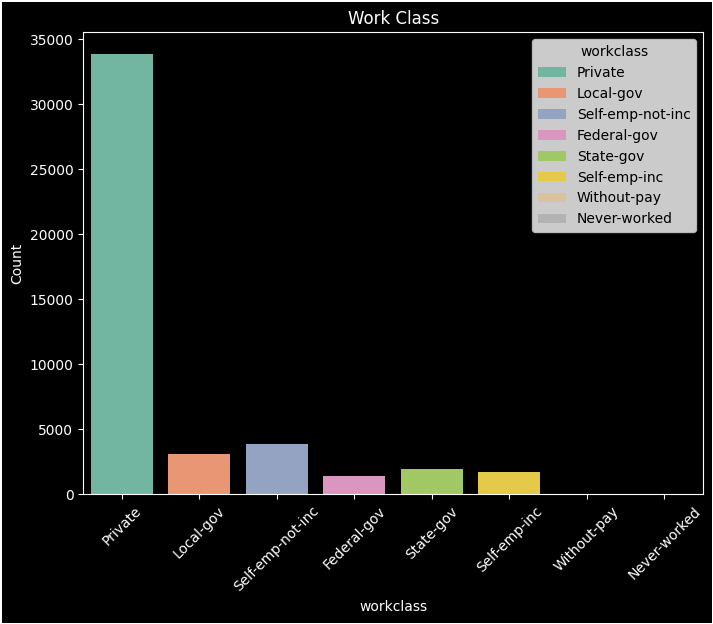

In [ ]:
plot_cat(df,'workclass','Work Class')

- This countplot shows that most of people in this dataset have private work (about 34000 person).
- A little people (about 4000) don`t have self employment.
-About 3000 person have local goverment work.

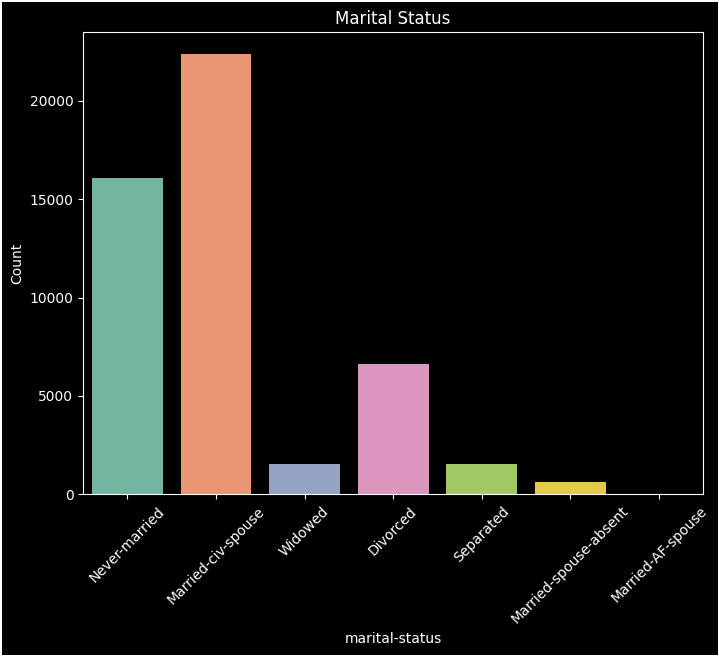

In [ ]:
plot_cat(df,'marital-status','Marital Status')

- This countplot shows that:
  - Most of people here are married to someone who is not in  the military (about 25000).
  - About 16000 person are never married.
  - About 1000 person are widowed.
  - About 7000 persons are divorced.

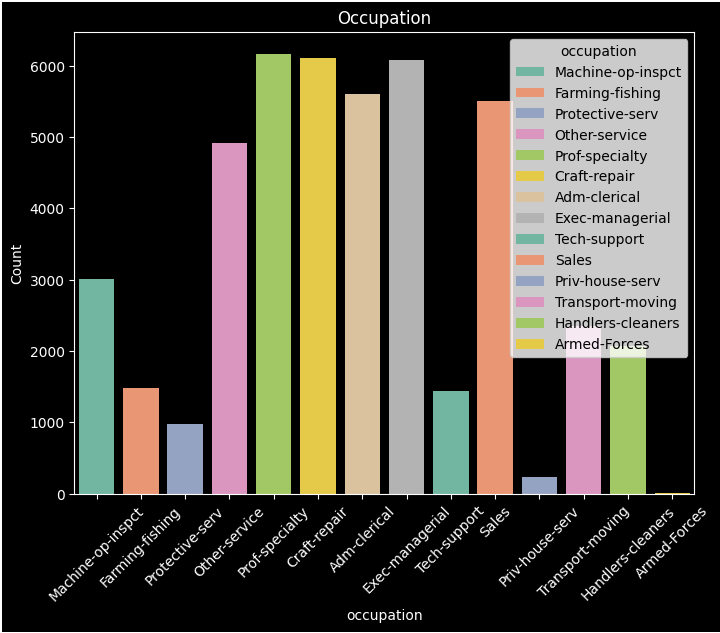

In [ ]:
plot_cat(df,'occupation','Occupation')

- A very little people works at armed forces.

##Preprocessing data for modeling

- Droping the target and 'fnlwgt' as this feature indicates how many people hold the same information in each row and that will not help in predicting an indiviual adult income.

In [13]:
# split data into training and testing sets
X = df.drop(columns=['income','fnlwgt'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# preprocess numeric features
numeric_features = X_train.select_dtypes(include='number').columns
# there is no null values here
#scale the data
scaler= StandardScaler()
num_pipeline = make_pipeline(scaler)
num_tuple = ('numeric',num_pipeline, numeric_features)

In [15]:
# preprocess categorical features
categorical_features = X_train.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse_output=False,drop='first')
cat_pipeline = make_pipeline(imputer, encoder)
cat_tuple = ('categorical', cat_pipeline, categorical_features)

In [16]:
# fit the data
preprocessor = ColumnTransformer(transformers=[num_tuple, cat_tuple],verbose_feature_names_out=False)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [17]:
# transform the data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##Create Logistic regression

In [ ]:
# create a baseline model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_processed, y_train)

LogisticRegression(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     27841
        >50K       0.73      0.60      0.66      8751

    accuracy                           0.85     36592
   macro avg       0.81      0.77      0.78     36592
weighted avg       0.85      0.85      0.85     36592



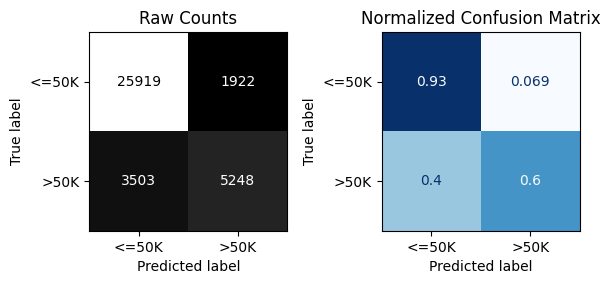


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      9268
        >50K       0.74      0.58      0.65      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.84      0.85      0.84     12198



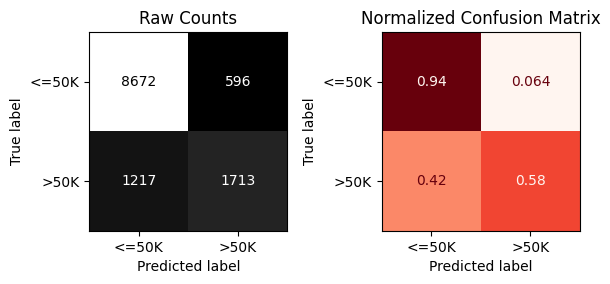

In [ ]:
# evaluate baseline model
evaluate_classification(lr, X_train_processed, y_train, X_test_processed, y_test)

- Notice that the data is imbalanced. I will fix this to get better results.

In [34]:
# oversampling using smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.84      0.80      0.82     27841
        >50K       0.81      0.85      0.83     27841

    accuracy                           0.82     55682
   macro avg       0.83      0.82      0.82     55682
weighted avg       0.83      0.82      0.82     55682



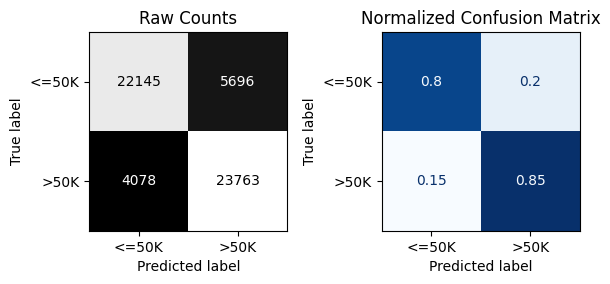


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      9268
        >50K       0.57      0.84      0.68      2930

    accuracy                           0.81     12198
   macro avg       0.75      0.82      0.77     12198
weighted avg       0.85      0.81      0.82     12198



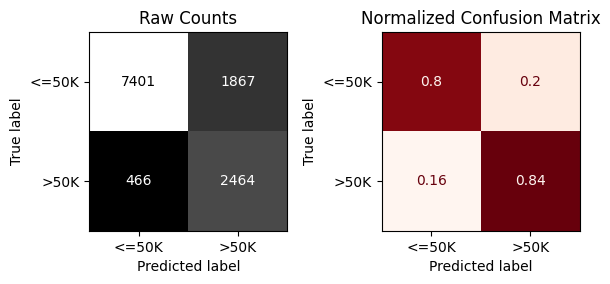

In [ ]:
# create another model using resampled data
lr_resampled = LogisticRegression(random_state=42)
lr_resampled.fit(X_train_resampled, y_train_resampled)
#evaluate
evaluate_classification(lr_resampled, X_train_resampled, y_train_resampled, X_test_processed, y_test)

- I will try to tune L1/l2 regularization to get better results.

In [ ]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'solver' : ['saga'],
               'penalty' : ['elasticnet'],
                'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'penalty' : ['l2'],
                  'C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'solver' : ['liblinear', 'saga'],
               'penalty' : ['l1'],
                'C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'penalty' : [None]}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]

In [ ]:
# Instantiate gridsearch
gs = GridSearchCV(lr_resampled, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train_resampled, y_train_resampled)
gs.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.84      0.80      0.82     27841
        >50K       0.81      0.85      0.83     27841

    accuracy                           0.82     55682
   macro avg       0.83      0.82      0.82     55682
weighted avg       0.83      0.82      0.82     55682



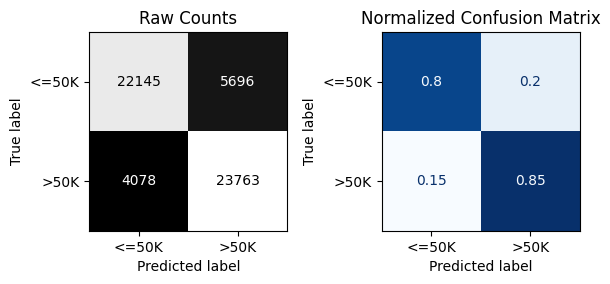


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      9268
        >50K       0.57      0.84      0.68      2930

    accuracy                           0.81     12198
   macro avg       0.75      0.82      0.77     12198
weighted avg       0.85      0.81      0.82     12198



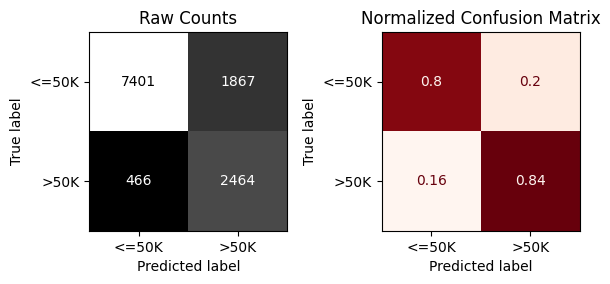

In [ ]:
best_lr= gs.best_estimator_
#evaluate
evaluate_classification(best_lr, X_train_resampled, y_train_resampled, X_test_processed, y_test)

- According to model evaluation:
   - It seems that there is no overfitting.
   - Accuracy = 81%
   - The model can detect 80% of people who their income <=50k dollars.
   - The model can detect 84% of people who their income >50k dollars.
   - The model predicts 94% of people in the dataset their income <=50k dollars and that`s true.
   -The model predicts 57% of people in the dataset their income >50k dollars and that`s true.
   - The model predicts 16% of people their income <=50k dollars while they actually have income >50k dollars.
   - The model predicts 20% of people their income >50k doolars while they actually have income <=50k dollars


In [ ]:
#Get the most important features whose affect heavily on model performance.
r = permutation_importance(best_lr, X_test_processed, y_test, n_repeats=5, random_state=42)
permutation_importance = pd.Series(r.importances_mean, index=preprocessor.get_feature_names_out(),name='permutation importance')
permutation_importance = permutation_importance.sort_values(ascending= False)
permutation_importance

marital-status_Married-civ-spouse    0.059502
educational-num                      0.027496
capital-gain                         0.022446
workclass_Self-emp-not-inc           0.005132
relationship_Not-in-family           0.004394
                                       ...   
marital-status_Separated            -0.000639
workclass_Private                   -0.000869
gender_Male                         -0.003591
marital-status_Never-married        -0.004820
relationship_Own-child              -0.006444
Name: permutation importance, Length: 81, dtype: float64

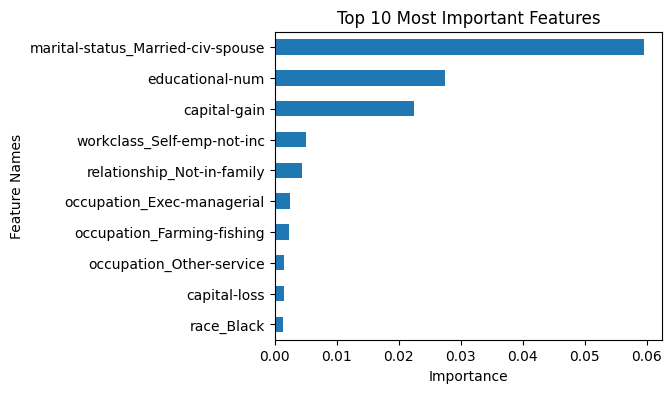

In [ ]:
plot_importance_color(permutation_importance, top_n=10);

- According to this visualization:
  - Being married to civilian is more important than other marital status .Also , it is the most important feature.
  - educational level is the second most important feature.
  - Captial gain is the third most important feature.
  - Not including self employment is more important than other workclass types , and it is the fourth most important feature.
  - Being not in family is more important than other relationship catgories , and it is the fifth most important feature.
  - Being work in executional managerial or in farming fishing is more important than other types in occupation , and it is the sixth most important feature.
  -Being in other service is more important than other types of occupations except executional managerial and in farming fishing, and it is the eighth most important feature.
  - Being black is more important than being white , and it is the tenth most important feature.

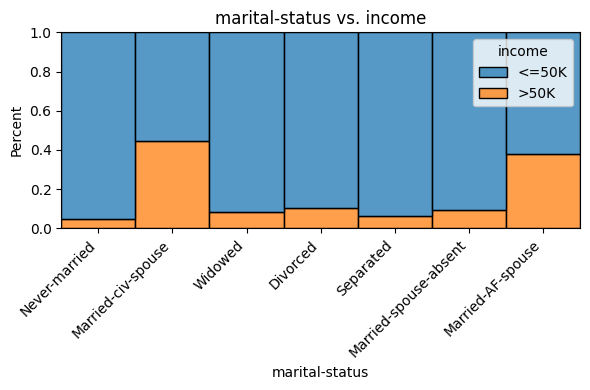

In [ ]:
plot_categorical_vs_target(df,x='marital-status',y='income',figsize=(6,4),
                            fillna = False,order = None, target_type='class');

- Martial status vs income:
   - About 5% of people who have never married have incomes > 50k dollars per year , while about 95% of them have incomes <=50k dollars per year.
   - About 42% of people who married civilian (the most important feature) have incomes >50k dollars per year , while 58% of them have incomes <=50k dollars per year.
   -About 10% of people who are widowed have incomes >50k dollars per year , while 90% of them have incomes <=50k dollars per year.
   - About 12% of people who are divorced have incomes > 50k dollars per year , while 88% of them have incomes <=50k dollars per year.
   - About 8% of people who are separated have incomes > 50k dollars per year , while 92% of them have incomes <=50k dollars per year.
   - About 12% of people who their spouse absent have incomes > 50k dollars per year , while 88% of them have incomes <=50k dollars per year.
   - About 40% of people who are married to armed forces people have incomes > 50k dollars per year , while 60% of them have incomes <=50k dollars per year.

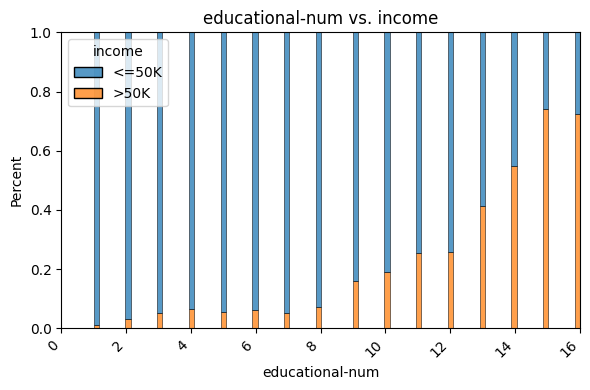

In [ ]:

plot_categorical_vs_target(df,x='educational-num',y='income',figsize=(6,4),
                            fillna = False,order = None, target_type='class');

- According to this visualization( the second most important feature):
  - People who have high educational levels like 15 and 16 , most of them have incomes >50k dollars per year.
  - While people in the lowest educational levels , most of them have incomes <=50k dollars per year.
  - The higher your educational level , the gearter your chance to get higher income.

### Custom functions

In [ ]:
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [ ]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

In [ ]:
def plot_cat(df,col,title):
  fig, ax = plt.subplots(figsize=(8, 6))
  fig.patch.set_facecolor('black')
  fig.patch.set_edgecolor('white')
  fig.patch.set_linewidth(2)
  ax.set_facecolor('black')
  ax.tick_params(colors='white')
  ax.set_xlabel(col ,color='white')
  ax.set_ylabel('Count',color='white')
  for spine in ax.spines.values():
    spine.set_color('white')
  sns.countplot(data=df, x=col, ax=ax, hue= col , palette='Set2')
  ax.set_title(title,color= 'white')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [54]:
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [ ]:
def plot_importance_color(importances, top_n=None,  figsize=(5,4),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

In [45]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

##Clustering

- group similar people into different groups.

In [ ]:
# scale the data
scaled_data= preprocessor.fit_transform(df)

Text(0.5, 1.0, 'Silhouette Score')

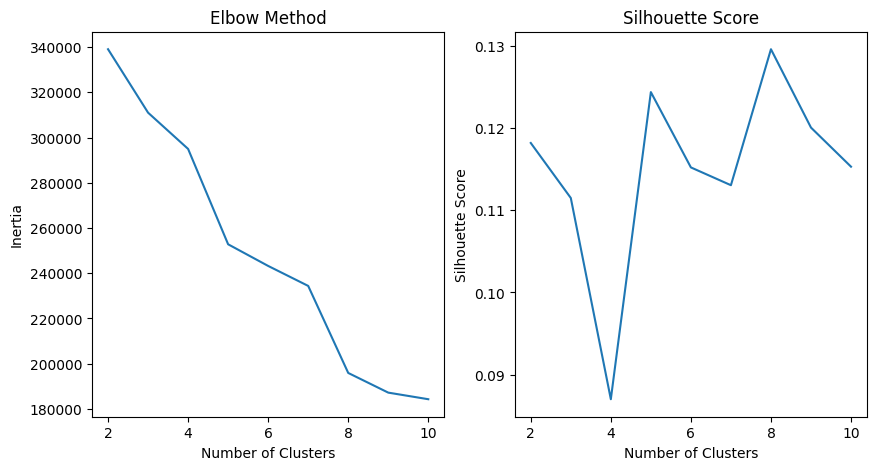

In [ ]:
#Search for the best number of clusters using elbow method and silhouette score
inertia = []
silhouette = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
  silhouette.append(silhouette_score(scaled_data, kmeans.labels_))
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(2,11),inertia)
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(range(2,11),silhouette)
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')


- I think that using 5 clusters will be the right decision , as inertia at 5 clusters is less than inertia at 2 or 3 or 4 clusters. Also , silouette score is high comparing with it at 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters=5,n_init='auto' ,random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# add cluster labels to the scaled data
df['cluster']= kmeans.labels_
display(df.head())

age  workclass  fnlwgt  educational-num      marital-status  \
0   25    Private  226802                7       Never-married   
1   38    Private   89814                9  Married-civ-spouse   
2   28  Local-gov  336951               12  Married-civ-spouse   
3   44    Private  160323               10  Married-civ-spouse   
4   18        NaN  103497               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  cluster  
0              40  United-States  <=50K        1  
1              50  United-States  <=50K        3  
2              40  United-States   >50K        2  
3              40  United-States   >50K        3  
4              30  United-States  <=50K        1

In [ ]:
# group by clusters
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a dictionary of aggregation functions for each column
agg_dict = {col: 'mean' for col in num_cols if col != 'cluster'} # Exclude cluster from mean calculation
agg_dict.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in cat_cols})

df_clustered = df.groupby('cluster').agg(agg_dict)
display(df_clustered.head())

age         fnlwgt  educational-num  capital-gain  \
cluster                                                            
0        57.287547  179483.771572         8.491604    487.772388   
1        24.997059  197991.430780         9.521415    103.033479   
2        41.888868  185855.460713        13.330197   3867.902042   
3        37.226308  191136.673884         8.970966    429.478242   
4        41.778820  188251.560769        10.998213      0.000000   

         capital-loss  hours-per-week workclass      marital-status  \
cluster                                                               
0            0.794543       34.413946   Private  Married-civ-spouse   
1            0.137536       32.986201   Private       Never-married   
2            0.668015       45.597817   Private  Married-civ-spouse   
3            0.671967       46.724640   Private  Married-civ-spouse   
4         1898.384718       43.344057   Private  Married-civ-spouse   

              occupation relationship   race  gender native-country income  
cluster                                                                     
0           Adm-clerical      Husband  White    Male  United-States  <=50K  
1          Other-service    Own-child  White  Female  United-States  <=50K  
2         Prof-specialty      Husband  White    Male  United-States   >50K  
3           Craft-repair      Husband  White    Male  United-States  <=50K  
4        Exec-managerial      Husband  White    Male  United-States   >50K

- Can`t visualize clusters as we have 5 clusters. But we can create pcs to visualize them.


In [ ]:
pcs = PCA(n_components=3)
pcs.fit(scaled_data)
pcs_data = pcs.transform(scaled_data)

In [ ]:
# visualize
fig = px.scatter_3d(pcs_data, x=0, y=1, z=2, color=kmeans.labels_)
fig.show()

- cluster 0 is colored by blue.
- cluster 1 is colored by purple.
-cluster 2 is colored by pink.
- cluster 3 is colored by orange .
- cluster 4 is colored by yellow.

##Instantiate Principle components

- It is a techniqe to of feature extraction, as we have 13 features in our training set , we can minimize it into 2 or 3 components for easier visualization , better model performance and more speed.

In [ ]:
# instantiate pcs
pca= PCA(n_components=3)
# fit on training set
pca.fit(X_train_resampled)

PCA(n_components=3)

In [ ]:
# transform on training and testing sets
X_train_pcs = pca.transform(X_train_resampled)
X_test_pcs = pca.transform(X_test_processed)

In [ ]:
# add pcs to the original dataframe
df_pcs = pd.DataFrame(X_train_pcs, columns=['PC1','PC2','PC3'])
df_pcs['target'] = y_train_resampled
df_with_pcs = pd.concat([df, df_pcs], axis=1)
df_with_pcs.head()

age  workclass    fnlwgt  educational-num      marital-status  \
0  25.0    Private  226802.0              7.0       Never-married   
1  38.0    Private   89814.0              9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0             12.0  Married-civ-spouse   
3  44.0    Private  160323.0             10.0  Married-civ-spouse   
4  18.0        NaN  103497.0             10.0       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4                NaN    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country income  cluster       PC1       PC2  \
0            40.0  United-States  <=50K      1.0 -0.337479 -0.302131   
1            50.0  United-States  <=50K      3.0  0.100028  0.357554   
2            40.0  United-States   >50K      2.0 -0.058155 -0.570593   
3            40.0  United-States   >50K      3.0 -0.915551 -1.369749   
4            30.0  United-States  <=50K      1.0 -0.507231 -0.629939   

        PC3 target  
0 -0.021248  <=50K  
1 -0.938863   >50K  
2  0.280963  <=50K  
3  1.893421  <=50K  
4  0.326506  <=50K

In [ ]:
# visualize pcs
fig = px.scatter_3d(df_pcs , x='PC1', y='PC2', z='PC3',color='target')
fig.show()

In [ ]:
# try to instantiate model using pcs
lr_pcs = LogisticRegression(random_state=42)
lr_pcs.fit(X_train_pcs, y_train_resampled)

LogisticRegression(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.77      0.78      0.78     27841
        >50K       0.78      0.76      0.77     27841

    accuracy                           0.77     55682
   macro avg       0.77      0.77      0.77     55682
weighted avg       0.77      0.77      0.77     55682



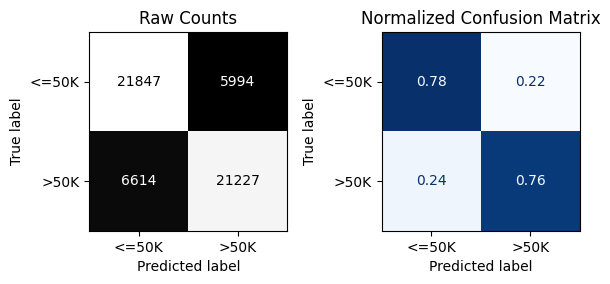


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.91      0.79      0.85      9268
        >50K       0.53      0.74      0.62      2930

    accuracy                           0.78     12198
   macro avg       0.72      0.77      0.73     12198
weighted avg       0.82      0.78      0.79     12198



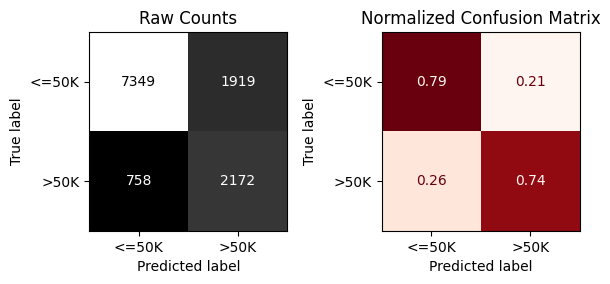

In [ ]:
# evaluate
evaluate_classification(lr_pcs, X_train_pcs, y_train_resampled, X_test_pcs, y_test)

- It seems that results were good when we used the original features.

## Trying some methods of feature engineering

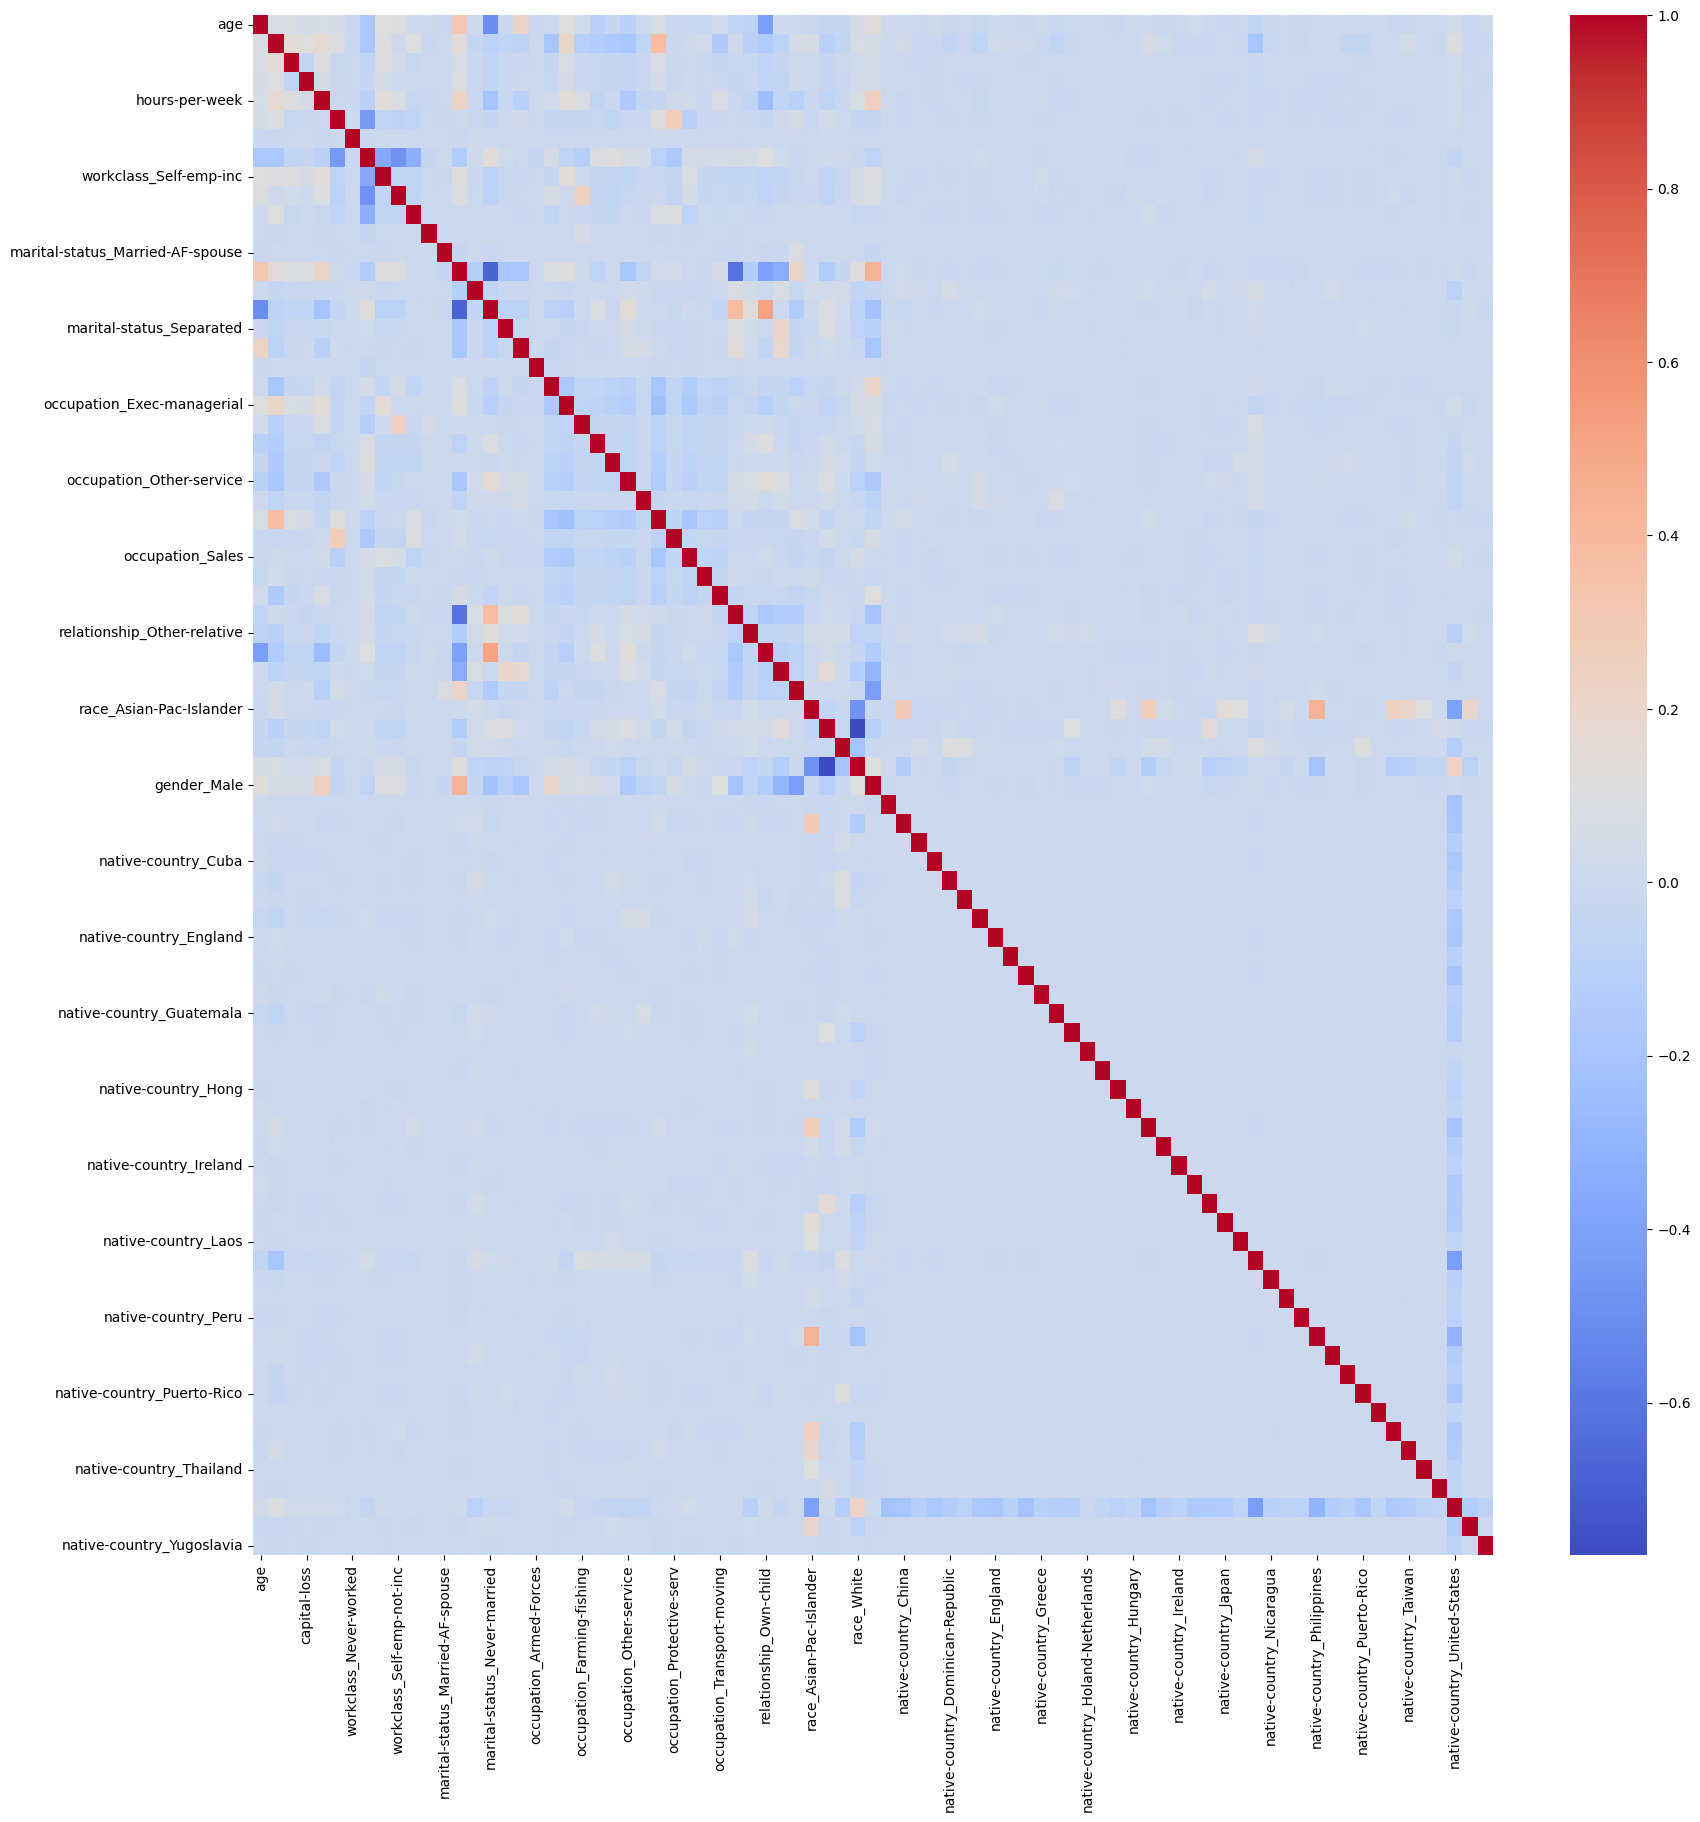

In [ ]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=preprocessor.get_feature_names_out())
corr = X_train_resampled_df.corr()
ax= sns.heatmap(corr,cmap='coolwarm')
ax.figure.set_size_inches(20,20)

- It seems that there is no multicolinearity(A lot of reds).
- Also , I don`t notice any constant or quasi-constant features in this dataset.
- A well as , we don`t have to reduce so many features as we have 13 features to fit which is not very large.

- I will try using embedded method : using logistic regression coefficients

In [ ]:
# Instantiate a lostistic regression model
log_reg = LogisticRegression(C=1e12)
# Define the selector object using the model. Use default threshold (mean)
selector = SelectFromModel(log_reg)
# Fit the selector on the training data
selector.fit(X_train_resampled ,y_train_resampled)
selector

SelectFromModel(estimator=LogisticRegression(C=1000000000000.0))

In [ ]:
# Obtain threshold used
selector.threshold_

np.float64(0.6974892636088432)

In [ ]:
selector.estimator_.coef_.shape

(1, 81)

In [ ]:
flattened = selector.estimator_.coef_.flatten()
flattened.shape

(81,)

In [ ]:
coeffs = pd.Series(flattened, index=preprocessor.get_feature_names_out())
coeffs

age                               0.386084
educational-num                   0.822581
capital-gain                      2.433046
capital-loss                      0.244361
hours-per-week                    0.453861
                                    ...   
native-country_Thailand          -1.072833
native-country_Trinadad&Tobago   -0.325819
native-country_United-States      0.491803
native-country_Vietnam           -0.996954
native-country_Yugoslavia         1.067409
Length: 81, dtype: float64

In [ ]:
above_threshold = selector.get_support()
coeffs[above_threshold]

educational-num                      0.822581
capital-gain                         2.433046
workclass_Self-emp-not-inc          -1.035898
workclass_State-gov                 -0.885108
workclass_Without-pay               -1.775025
marital-status_Married-AF-spouse     2.053388
marital-status_Married-civ-spouse    2.437194
occupation_Farming-fishing          -1.281809
occupation_Handlers-cleaners        -0.936132
occupation_Other-service            -1.061131
occupation_Priv-house-serv          -3.136878
relationship_Other-relative         -0.965478
relationship_Own-child              -0.839778
relationship_Wife                    1.143255
race_Asian-Pac-Islander              1.112989
race_White                           0.786178
native-country_Columbia             -2.509558
native-country_Dominican-Republic   -1.345579
native-country_England               1.013935
native-country_Hong                 -0.797845
native-country_Ireland               1.753691
native-country_Italy                 0.759849
native-country_Jamaica               0.774451
native-country_Peru                 -0.766918
native-country_Portugal              1.082074
native-country_Scotland             -1.272143
native-country_South                -1.506448
native-country_Thailand             -1.072833
native-country_Vietnam              -0.996954
native-country_Yugoslavia            1.067409
dtype: float64

In [ ]:
above_threshold = selector.get_support()
# Only include the features that are above the threshold in X train and X test
X_train_sel = X_train_resampled_df.loc[:,above_threshold]
X_test_processed_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())
X_test_sel = X_test_processed_df.loc[:,above_threshold]
X_train_sel.shape

(55682, 30)

In [ ]:
# instantiate a new log_reg
log_reg = LogisticRegression(random_state=42)
# fit the model
log_reg.fit(X_train_sel, y_train_resampled)

LogisticRegression(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.84      0.76      0.80     27841
        >50K       0.78      0.86      0.82     27841

    accuracy                           0.81     55682
   macro avg       0.81      0.81      0.81     55682
weighted avg       0.81      0.81      0.81     55682



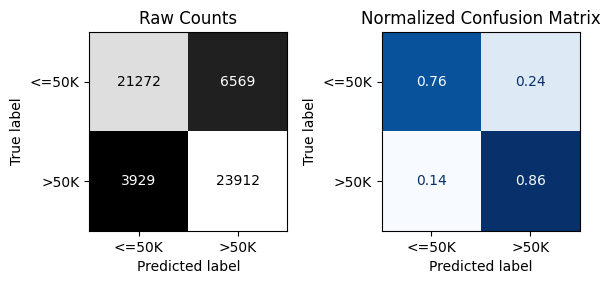


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.77      0.85      9268
        >50K       0.54      0.85      0.66      2930

    accuracy                           0.79     12198
   macro avg       0.74      0.81      0.75     12198
weighted avg       0.84      0.79      0.80     12198



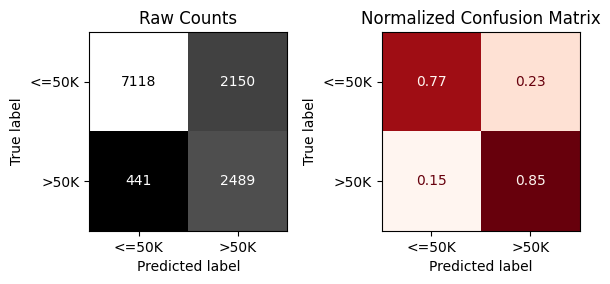

In [ ]:
# evaluate
evaluate_classification(log_reg, X_train_sel, y_train_resampled, X_test_sel, y_test)

- According to model evaluation:
It seems that there is no overfitting.
 - Accuracy = 79%
 - The model can detect 77% of people who their income <=50k dollars.
 - The model can detect 85% of people who their income >50k dollars.
 - The model predicts 94% of people in the dataset their income <=50k dollars and that`s true.
 - The model predicts 54% of people in the dataset their income >50k dollars and that`s true.
 - The model predicts 15% of people their income <=50k dollars while they actually have income >50k dollars.
 - The model predicts 23% of people their income >50k doolars while they actually have income <=50k dollars.

- Feature selection using logistic regression coefficients does`nt enhance the model performance as:
  -  the accuracy decreased by 2% .
  - detecting people who their incomes <=50k dollars decreased by 3%.
  - detecting people who their incomes >50k dollars increased by 1% .
  - Percision of class ">50k" decreased by 3%.
  - False positive erros increased by 1%.
  - False negative erros increased by 3% .

##Neural Network

In [35]:
# get the number of features as the input for the input layer
input_shape = X_train_resampled.shape[1]
input_shape

81

So, 81 features will be entered into input layer.

In [36]:
# choose the type of the model -> I will choose sequential model where layers ran sequentially
model = Sequential()

In [37]:
# the first hidden layer
model.add(Dense(units= 81, activation='relu', input_shape=(input_shape,)))

In [38]:
# output layer (task is  binary classification so , I need one unit and the activation function will be sigmoid)
model.add(Dense(units=1, activation='sigmoid'))

In [39]:
# complie the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name= 'precision'), tf.keras.metrics.Recall(name = 'recall')])

In [61]:
# One-hot encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_resampled)

In [62]:
# fit the model
history = model.fit(X_train_resampled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8430 - loss: 0.3308 - precision: 0.7844 - recall: 0.7995 - val_accuracy: 0.8154 - val_loss: 0.4200 - val_precision: 1.0000 - val_recall: 0.8154
Epoch 2/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8422 - loss: 0.3307 - precision: 0.7842 - recall: 0.8017 - val_accuracy: 0.8003 - val_loss: 0.4459 - val_precision: 1.0000 - val_recall: 0.8003
Epoch 3/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8427 - loss: 0.3336 - precision: 0.7866 - recall: 0.7994 - val_accuracy: 0.8401 - val_loss: 0.3889 - val_precision: 1.0000 - val_recall: 0.8401
Epoch 4/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8427 - loss: 0.3324 - precision: 0.7835 - recall: 0.8078 - val_accuracy: 0.7770 - val_loss: 0.4731 - val_precision: 1.0000 - val_recall: 0.7770
Epoch 5/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8451 - loss: 0.3292 - precision: 0.7889 - recall: 0.8011 - val_accuracy: 0.8152 - va

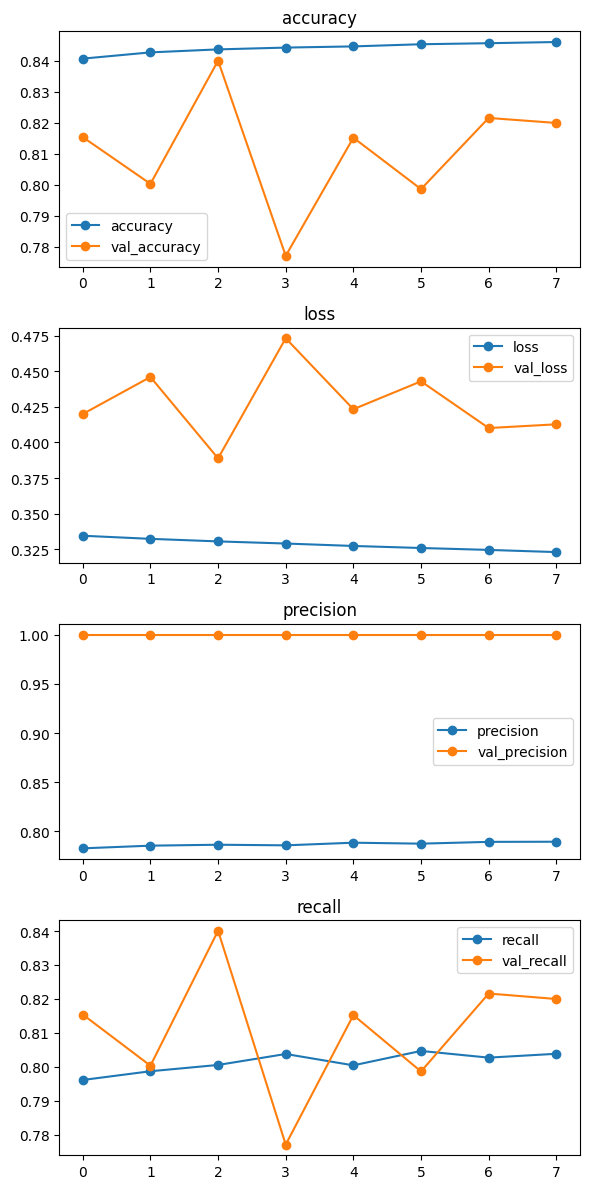

In [63]:
plot_history(history);

In [65]:
# evaluate on unseen data
y_test_encoded = le.transform(y_test)
model.evaluate(X_test_processed, y_test_encoded, return_dict=True)

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 0.3406 - precision: 0.6377 - recall: 0.7685


{'accuracy': 0.8380882143974304,
 'loss': 0.33792099356651306,
 'precision': 0.6346207857131958,
 'recall': 0.7682594060897827}

Training data
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     27841
           1       0.86      0.82      0.84     27841

    accuracy                           0.84     55682
   macro avg       0.84      0.84      0.84     55682
weighted avg       0.84      0.84      0.84     55682



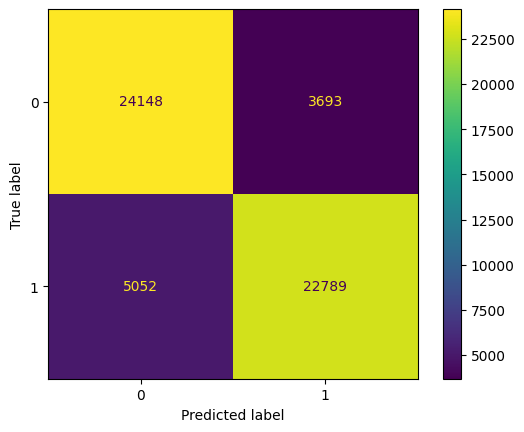

In [70]:
# evaluate using classification metrics
print('Training data')
train_preds= model.predict(X_train_resampled)
print(classification_report(y_train_encoded, train_preds.round()))
ConfusionMatrixDisplay.from_predictions(y_train_encoded, train_preds.round());

Testing data
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9268
           1       0.63      0.77      0.70      2930

    accuracy                           0.84     12198
   macro avg       0.78      0.81      0.79     12198
weighted avg       0.85      0.84      0.84     12198



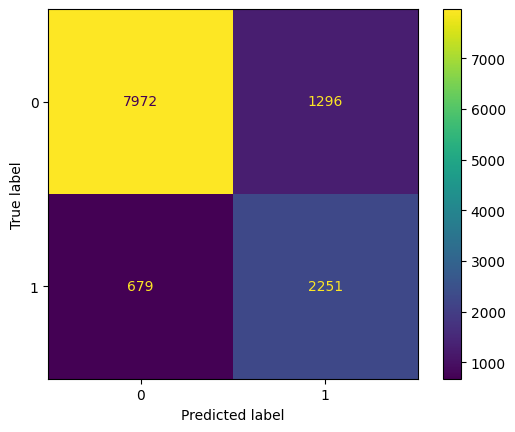

In [71]:
# evaluate testing set using classification metrics
print('Testing data')
test_preds= model.predict(X_test_processed)
print(classification_report(y_test_encoded, test_preds.round()))
ConfusionMatrixDisplay.from_predictions(y_test_encoded, test_preds.round());

##Tuning 3 parameters to get the best neural network

In [ ]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19,input_dim =input_shape,activation = 'relu'))
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce', metrics=['accuracy',tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.Precision(name='precision')])
    return model

In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [ ]:
# Define tuner object
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=100, directory=folder, overwrite = True, seed = 42 , project_name='Adult_incomes_tuning')

In [ ]:
# Run the tuner
epochs = 100
tuner.search(X_train_resampled, y_train_encoded,  epochs=epochs, validation_split= .2, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)])

In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

In [ ]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

In [73]:
!pip install keras_tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 652.7 kB/s eta 0:00:00
